In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [6]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

Epoch 1/50
8/8 [==============================] - 1s 32ms/step - loss: 0.5250 - accuracy: 0.7321 - val_loss: 0.3867 - val_accuracy: 0.7815
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.4268 - accuracy: 0.7524 - val_loss: 0.3426 - val_accuracy: 0.8054
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3750 - accuracy: 0.8209 - val_loss: 0.3213 - val_accuracy: 0.8800
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3529 - accuracy: 0.8799 - val_loss: 0.3007 - val_accuracy: 0.8962
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3413 - accuracy: 0.8909 - val_loss: 0.2924 - val_accuracy: 0.9038
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3370 - accuracy: 0.8953 - val_loss: 0.2873 - val_accuracy: 0.9085
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3331 - accuracy: 0.8989 - val_loss: 0.2844 - val_accuracy: 0.9108
Epoch 8/50
8/8 [=================

In [8]:
score = model.evaluate(X_test, y_test)
print('test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9723
test accuracy: 0.9723076820373535


In [9]:
modelpath = "./{epoch:02d}-{val_accuracy:.4f}.hdf5"

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to .\01-0.9700.hdf5

Epoch 2: saving model to .\02-0.9715.hdf5

Epoch 3: saving model to .\03-0.9731.hdf5

Epoch 4: saving model to .\04-0.9731.hdf5

Epoch 5: saving model to .\05-0.9700.hdf5

Epoch 6: saving model to .\06-0.9700.hdf5

Epoch 7: saving model to .\07-0.9738.hdf5

Epoch 8: saving model to .\08-0.9738.hdf5

Epoch 9: saving model to .\09-0.9715.hdf5

Epoch 10: saving model to .\10-0.9731.hdf5

Epoch 11: saving model to .\11-0.9738.hdf5

Epoch 12: saving model to .\12-0.9762.hdf5

Epoch 13: saving model to .\13-0.9785.hdf5

Epoch 14: saving model to .\14-0.9769.hdf5

Epoch 15: saving model to .\15-0.9769.hdf5

Epoch 16: saving model to .\16-0.9769.hdf5

Epoch 17: saving model to .\17-0.9785.hdf5

Epoch 18: saving model to .\18-0.9777.hdf5

Epoch 19: saving model to .\19-0.9785.hdf5

Epoch 20: saving model to .\20-0.9777.hdf5

Epoch 21: saving model to .\21-0.9777.hdf5

Epoch 22: saving model to .\22-0.9769.hdf5

Epoch 23: saving model to .\23-0.9792.hd

In [12]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9815
Test accuracy: 0.9815384745597839


In [18]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0610 - accuracy: 0.9831 - val_loss: 0.0475 - val_accuracy: 0.9854
Epoch 2/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0560 - accuracy: 0.9856 - val_loss: 0.0507 - val_accuracy: 0.9838
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0580 - accuracy: 0.9854 - val_loss: 0.0470 - val_accuracy: 0.9854
Epoch 4/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0592 - accuracy: 0.9846 - val_loss: 0.0574 - val_accuracy: 0.9800
Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0663 - accuracy: 0.9813 - val_loss: 0.0472 - val_accuracy: 0.9838
Epoch 6/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 0.9851 - val_loss: 0.0499 - val_accuracy: 0.9838
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0577 - accuracy: 0.9851 - val_loss: 0.0457 - val_accuracy: 0.9862
Epoch 8/2000
8/8 [=

8/8 [==============================] - 0s 6ms/step - loss: 0.0545 - accuracy: 0.9846 - val_loss: 0.0558 - val_accuracy: 0.9838
Epoch 60/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0537 - accuracy: 0.9854 - val_loss: 0.0553 - val_accuracy: 0.9831
Epoch 61/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0541 - accuracy: 0.9859 - val_loss: 0.0493 - val_accuracy: 0.9831
Epoch 62/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0553 - accuracy: 0.9854 - val_loss: 0.0461 - val_accuracy: 0.9846
Epoch 63/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0517 - accuracy: 0.9869 - val_loss: 0.0515 - val_accuracy: 0.9823
Epoch 64/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.9864 - val_loss: 0.0475 - val_accuracy: 0.9846
Epoch 65/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9856 - val_loss: 0.0484 - val_accuracy: 0.9823
Epoch 66/2000
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.0560 - accuracy: 0.9854 - val_loss: 0.0519 - val_accuracy: 0.9838
Epoch 118/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0491 - accuracy: 0.9874 - val_loss: 0.0437 - val_accuracy: 0.9862
Epoch 119/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0498 - accuracy: 0.9887 - val_loss: 0.0429 - val_accuracy: 0.9869
Epoch 120/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0521 - accuracy: 0.9859 - val_loss: 0.0448 - val_accuracy: 0.9854
Epoch 121/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0487 - accuracy: 0.9869 - val_loss: 0.0441 - val_accuracy: 0.9854
Epoch 122/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0491 - accuracy: 0.9877 - val_loss: 0.0452 - val_accuracy: 0.9846
Epoch 123/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0483 - accuracy: 0.9874 - val_loss: 0.0438 - val_accuracy: 0.9869
Epoch 124/2000
8/8 [=

Epoch 175/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0490 - accuracy: 0.9869 - val_loss: 0.0431 - val_accuracy: 0.9869
Epoch 176/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0468 - accuracy: 0.9879 - val_loss: 0.0423 - val_accuracy: 0.9869
Epoch 177/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0468 - accuracy: 0.9879 - val_loss: 0.0483 - val_accuracy: 0.9862
Epoch 178/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0485 - accuracy: 0.9882 - val_loss: 0.0453 - val_accuracy: 0.9854
Epoch 179/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0484 - accuracy: 0.9900 - val_loss: 0.0490 - val_accuracy: 0.9846
Epoch 180/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0493 - accuracy: 0.9874 - val_loss: 0.0598 - val_accuracy: 0.9815
Epoch 181/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0529 - accuracy: 0.9849 - val_loss: 0.0551 - val_accuracy: 0.9838
Epoch 

Epoch 233/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0456 - accuracy: 0.9887 - val_loss: 0.0420 - val_accuracy: 0.9869
Epoch 234/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9895 - val_loss: 0.0428 - val_accuracy: 0.9838
Epoch 235/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0463 - accuracy: 0.9892 - val_loss: 0.0419 - val_accuracy: 0.9877
Epoch 236/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0456 - accuracy: 0.9897 - val_loss: 0.0428 - val_accuracy: 0.9869
Epoch 237/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9887 - val_loss: 0.0425 - val_accuracy: 0.9862
Epoch 238/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0450 - accuracy: 0.9887 - val_loss: 0.0424 - val_accuracy: 0.9869
Epoch 239/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0478 - accuracy: 0.9877 - val_loss: 0.0426 - val_accuracy: 0.9869
Epoch 

Epoch 291/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0457 - accuracy: 0.9892 - val_loss: 0.0421 - val_accuracy: 0.9877
Epoch 292/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0443 - accuracy: 0.9892 - val_loss: 0.0430 - val_accuracy: 0.9838
Epoch 293/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0447 - accuracy: 0.9900 - val_loss: 0.0425 - val_accuracy: 0.9862
Epoch 294/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0445 - accuracy: 0.9895 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 295/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0444 - accuracy: 0.9897 - val_loss: 0.0422 - val_accuracy: 0.9869
Epoch 296/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0451 - accuracy: 0.9867 - val_loss: 0.0416 - val_accuracy: 0.9877
Epoch 297/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0438 - accuracy: 0.9895 - val_loss: 0.0437 - val_accuracy: 0.9885
Epoch 

Epoch 349/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9895 - val_loss: 0.0428 - val_accuracy: 0.9877
Epoch 350/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0442 - accuracy: 0.9879 - val_loss: 0.0436 - val_accuracy: 0.9877
Epoch 351/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0445 - accuracy: 0.9895 - val_loss: 0.0443 - val_accuracy: 0.9877
Epoch 352/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0457 - accuracy: 0.9879 - val_loss: 0.0437 - val_accuracy: 0.9892
Epoch 353/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0425 - accuracy: 0.9885 - val_loss: 0.0427 - val_accuracy: 0.9877
Epoch 354/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.9887 - val_loss: 0.0430 - val_accuracy: 0.9877
Epoch 355/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0439 - accuracy: 0.9902 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 

Epoch 407/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0453 - accuracy: 0.9892 - val_loss: 0.0441 - val_accuracy: 0.9869
Epoch 408/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0432 - accuracy: 0.9895 - val_loss: 0.0520 - val_accuracy: 0.9846
Epoch 409/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9887 - val_loss: 0.0431 - val_accuracy: 0.9869
Epoch 410/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0489 - accuracy: 0.9861 - val_loss: 0.0465 - val_accuracy: 0.9885
Epoch 411/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0435 - accuracy: 0.9900 - val_loss: 0.0480 - val_accuracy: 0.9862
Epoch 412/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9892 - val_loss: 0.0420 - val_accuracy: 0.9892
Epoch 413/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0443 - accuracy: 0.9885 - val_loss: 0.0432 - val_accuracy: 0.9877
Epoch 

Epoch 465/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.9895 - val_loss: 0.0523 - val_accuracy: 0.9877
Epoch 466/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0437 - accuracy: 0.9900 - val_loss: 0.0516 - val_accuracy: 0.9862
Epoch 467/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9895 - val_loss: 0.0526 - val_accuracy: 0.9862
Epoch 468/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9885 - val_loss: 0.0459 - val_accuracy: 0.9877
Epoch 469/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0418 - accuracy: 0.9902 - val_loss: 0.0454 - val_accuracy: 0.9877
Epoch 470/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9900 - val_loss: 0.0432 - val_accuracy: 0.9877
Epoch 471/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9895 - val_loss: 0.0425 - val_accuracy: 0.9877
Epoch 

Epoch 523/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0401 - accuracy: 0.9915 - val_loss: 0.0506 - val_accuracy: 0.9892
Epoch 524/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0441 - accuracy: 0.9900 - val_loss: 0.0450 - val_accuracy: 0.9877
Epoch 525/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0396 - accuracy: 0.9913 - val_loss: 0.0424 - val_accuracy: 0.9877
Epoch 526/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0424 - accuracy: 0.9900 - val_loss: 0.0431 - val_accuracy: 0.9877
Epoch 527/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0405 - accuracy: 0.9908 - val_loss: 0.0435 - val_accuracy: 0.9877
Epoch 528/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 0.9908 - val_loss: 0.0429 - val_accuracy: 0.9877
Epoch 529/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0402 - accuracy: 0.9905 - val_loss: 0.0449 - val_accuracy: 0.9877
Epoch 

Epoch 581/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9905 - val_loss: 0.0465 - val_accuracy: 0.9885
Epoch 582/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0399 - accuracy: 0.9895 - val_loss: 0.0447 - val_accuracy: 0.9877
Epoch 583/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0410 - accuracy: 0.9902 - val_loss: 0.0474 - val_accuracy: 0.9885
Epoch 584/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0396 - accuracy: 0.9900 - val_loss: 0.0508 - val_accuracy: 0.9869
Epoch 585/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9900 - val_loss: 0.0490 - val_accuracy: 0.9869
Epoch 586/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0418 - accuracy: 0.9902 - val_loss: 0.0586 - val_accuracy: 0.9838
Epoch 587/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0418 - accuracy: 0.9897 - val_loss: 0.0526 - val_accuracy: 0.9854
Epoch 

Epoch 639/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0388 - accuracy: 0.9918 - val_loss: 0.0575 - val_accuracy: 0.9831
Epoch 640/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0446 - accuracy: 0.9887 - val_loss: 0.0745 - val_accuracy: 0.9777
Epoch 641/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0464 - accuracy: 0.9869 - val_loss: 0.0455 - val_accuracy: 0.9877
Epoch 642/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0412 - accuracy: 0.9905 - val_loss: 0.0474 - val_accuracy: 0.9900
Epoch 643/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9905 - val_loss: 0.0443 - val_accuracy: 0.9892
Epoch 644/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0425 - accuracy: 0.9890 - val_loss: 0.0432 - val_accuracy: 0.9877
Epoch 645/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0418 - accuracy: 0.9890 - val_loss: 0.0467 - val_accuracy: 0.9877
Epoch 

Epoch 697/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0414 - accuracy: 0.9900 - val_loss: 0.0458 - val_accuracy: 0.9877
Epoch 698/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0399 - accuracy: 0.9892 - val_loss: 0.0481 - val_accuracy: 0.9885
Epoch 699/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0403 - accuracy: 0.9892 - val_loss: 0.0590 - val_accuracy: 0.9831
Epoch 700/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0402 - accuracy: 0.9900 - val_loss: 0.0468 - val_accuracy: 0.9877
Epoch 701/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 0.9900 - val_loss: 0.0435 - val_accuracy: 0.9885
Epoch 702/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0401 - accuracy: 0.9905 - val_loss: 0.0455 - val_accuracy: 0.9877
Epoch 703/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0405 - accuracy: 0.9910 - val_loss: 0.0481 - val_accuracy: 0.9854
Epoch 

Epoch 755/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.9908 - val_loss: 0.0445 - val_accuracy: 0.9877
Epoch 756/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0379 - accuracy: 0.9913 - val_loss: 0.0464 - val_accuracy: 0.9877
Epoch 757/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.9910 - val_loss: 0.0456 - val_accuracy: 0.9877
Epoch 758/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.9910 - val_loss: 0.0483 - val_accuracy: 0.9885
Epoch 759/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.9913 - val_loss: 0.0447 - val_accuracy: 0.9885
Epoch 760/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0391 - accuracy: 0.9902 - val_loss: 0.0448 - val_accuracy: 0.9877
Epoch 761/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0373 - accuracy: 0.9908 - val_loss: 0.0449 - val_accuracy: 0.9877
Epoch 

Epoch 813/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0396 - accuracy: 0.9905 - val_loss: 0.0449 - val_accuracy: 0.9877
Epoch 814/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0415 - accuracy: 0.9887 - val_loss: 0.0500 - val_accuracy: 0.9877
Epoch 815/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0401 - accuracy: 0.9887 - val_loss: 0.0583 - val_accuracy: 0.9869
Epoch 816/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0389 - accuracy: 0.9900 - val_loss: 0.0474 - val_accuracy: 0.9885
Epoch 817/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0381 - accuracy: 0.9910 - val_loss: 0.0456 - val_accuracy: 0.9885
Epoch 818/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0380 - accuracy: 0.9908 - val_loss: 0.0454 - val_accuracy: 0.9877
Epoch 819/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0415 - accuracy: 0.9902 - val_loss: 0.0448 - val_accuracy: 0.9877
Epoch 

8/8 [==============================] - 0s 6ms/step - loss: 0.0440 - accuracy: 0.9877 - val_loss: 0.0524 - val_accuracy: 0.9877
Epoch 871/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0398 - accuracy: 0.9897 - val_loss: 0.0578 - val_accuracy: 0.9862
Epoch 872/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0390 - accuracy: 0.9908 - val_loss: 0.0477 - val_accuracy: 0.9892
Epoch 873/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0369 - accuracy: 0.9915 - val_loss: 0.0458 - val_accuracy: 0.9877
Epoch 874/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0360 - accuracy: 0.9910 - val_loss: 0.0456 - val_accuracy: 0.9877
Epoch 875/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0382 - accuracy: 0.9910 - val_loss: 0.0458 - val_accuracy: 0.9877
Epoch 876/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.9902 - val_loss: 0.0453 - val_accuracy: 0.9877
Epoch 877/2000
8/8 [=

Epoch 928/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0396 - accuracy: 0.9908 - val_loss: 0.0482 - val_accuracy: 0.9877
Epoch 929/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0397 - accuracy: 0.9897 - val_loss: 0.0507 - val_accuracy: 0.9846
Epoch 930/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0444 - accuracy: 0.9879 - val_loss: 0.0474 - val_accuracy: 0.9862
Epoch 931/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0422 - accuracy: 0.9897 - val_loss: 0.0464 - val_accuracy: 0.9854
Epoch 932/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0398 - accuracy: 0.9900 - val_loss: 0.0454 - val_accuracy: 0.9877
Epoch 933/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0384 - accuracy: 0.9908 - val_loss: 0.0467 - val_accuracy: 0.9892
Epoch 934/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0380 - accuracy: 0.9913 - val_loss: 0.0491 - val_accuracy: 0.9885
Epoch

Epoch 986/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0363 - accuracy: 0.9910 - val_loss: 0.0540 - val_accuracy: 0.9869
Epoch 987/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.9910 - val_loss: 0.0450 - val_accuracy: 0.9877
Epoch 988/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.9908 - val_loss: 0.0447 - val_accuracy: 0.9877
Epoch 989/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.9902 - val_loss: 0.0451 - val_accuracy: 0.9885
Epoch 990/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9908 - val_loss: 0.0506 - val_accuracy: 0.9892
Epoch 991/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.9918 - val_loss: 0.0458 - val_accuracy: 0.9877
Epoch 992/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0373 - accuracy: 0.9908 - val_loss: 0.0461 - val_accuracy: 0.9877
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.9923 - val_loss: 0.0466 - val_accuracy: 0.9885
Epoch 1044/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0391 - accuracy: 0.9900 - val_loss: 0.0453 - val_accuracy: 0.9892
Epoch 1045/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.9905 - val_loss: 0.0463 - val_accuracy: 0.9885
Epoch 1046/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.9905 - val_loss: 0.0473 - val_accuracy: 0.9869
Epoch 1047/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.9902 - val_loss: 0.0456 - val_accuracy: 0.9892
Epoch 1048/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.9915 - val_loss: 0.0461 - val_accuracy: 0.9877
Epoch 1049/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.9910 - val_loss: 0.0456 - val_accuracy: 0.9892
Epoch 1050/2000

8/8 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.9908 - val_loss: 0.0460 - val_accuracy: 0.9862
Epoch 1101/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.9900 - val_loss: 0.0456 - val_accuracy: 0.9877
Epoch 1102/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0380 - accuracy: 0.9902 - val_loss: 0.0458 - val_accuracy: 0.9885
Epoch 1103/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0385 - accuracy: 0.9895 - val_loss: 0.0510 - val_accuracy: 0.9869
Epoch 1104/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0474 - val_accuracy: 0.9869
Epoch 1105/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0385 - accuracy: 0.9905 - val_loss: 0.0444 - val_accuracy: 0.9885
Epoch 1106/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0414 - accuracy: 0.9887 - val_loss: 0.0459 - val_accuracy: 0.9892
Epoch 1107/2000

8/8 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9920 - val_loss: 0.0460 - val_accuracy: 0.9877
Epoch 1158/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.9913 - val_loss: 0.0466 - val_accuracy: 0.9885
Epoch 1159/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0392 - accuracy: 0.9890 - val_loss: 0.0458 - val_accuracy: 0.9885
Epoch 1160/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.9902 - val_loss: 0.0448 - val_accuracy: 0.9885
Epoch 1161/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.9895 - val_loss: 0.0481 - val_accuracy: 0.9892
Epoch 1162/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0379 - accuracy: 0.9920 - val_loss: 0.0454 - val_accuracy: 0.9877
Epoch 1163/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0380 - accuracy: 0.9908 - val_loss: 0.0457 - val_accuracy: 0.9885
Epoch 1164/2000

8/8 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.9918 - val_loss: 0.0490 - val_accuracy: 0.9908
Epoch 1215/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 0.9908 - val_loss: 0.0474 - val_accuracy: 0.9908
Epoch 1216/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 0.9908 - val_loss: 0.0470 - val_accuracy: 0.9885
Epoch 1217/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0388 - accuracy: 0.9897 - val_loss: 0.0454 - val_accuracy: 0.9885
Epoch 1218/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.9923 - val_loss: 0.0458 - val_accuracy: 0.9877
Epoch 1219/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.9905 - val_loss: 0.0450 - val_accuracy: 0.9877
Epoch 1220/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0368 - accuracy: 0.9910 - val_loss: 0.0460 - val_accuracy: 0.9877
Epoch 1221/2000

8/8 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.9915 - val_loss: 0.0481 - val_accuracy: 0.9892
Epoch 1272/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.9923 - val_loss: 0.0458 - val_accuracy: 0.9877
Epoch 1273/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.9910 - val_loss: 0.0476 - val_accuracy: 0.9900
Epoch 1274/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.9910 - val_loss: 0.0458 - val_accuracy: 0.9885
Epoch 1275/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.9910 - val_loss: 0.0451 - val_accuracy: 0.9885
Epoch 1276/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.9926 - val_loss: 0.0488 - val_accuracy: 0.9885
Epoch 1277/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0363 - accuracy: 0.9920 - val_loss: 0.0483 - val_accuracy: 0.9892
Epoch 1278/2000

8/8 [==============================] - 0s 7ms/step - loss: 0.0350 - accuracy: 0.9918 - val_loss: 0.0485 - val_accuracy: 0.9892
Epoch 1329/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0384 - accuracy: 0.9902 - val_loss: 0.0486 - val_accuracy: 0.9908
Epoch 1330/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0417 - accuracy: 0.9885 - val_loss: 0.0568 - val_accuracy: 0.9854
Epoch 1331/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0405 - accuracy: 0.9879 - val_loss: 0.0605 - val_accuracy: 0.9838
Epoch 1332/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0400 - accuracy: 0.9887 - val_loss: 0.0536 - val_accuracy: 0.9869
Epoch 1333/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.9902 - val_loss: 0.0506 - val_accuracy: 0.9885
Epoch 1334/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0367 - accuracy: 0.9915 - val_loss: 0.0484 - val_accuracy: 0.9885
Epoch 1335/2000

8/8 [==============================] - 0s 6ms/step - loss: 0.0373 - accuracy: 0.9923 - val_loss: 0.0542 - val_accuracy: 0.9862
Epoch 1386/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0394 - accuracy: 0.9902 - val_loss: 0.0514 - val_accuracy: 0.9862
Epoch 1387/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0353 - accuracy: 0.9918 - val_loss: 0.0481 - val_accuracy: 0.9908
Epoch 1388/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0360 - accuracy: 0.9908 - val_loss: 0.0465 - val_accuracy: 0.9877
Epoch 1389/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0354 - accuracy: 0.9913 - val_loss: 0.0449 - val_accuracy: 0.9900
Epoch 1390/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.9908 - val_loss: 0.0457 - val_accuracy: 0.9892
Epoch 1391/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0349 - accuracy: 0.9908 - val_loss: 0.0457 - val_accuracy: 0.9877
Epoch 1392/2000

8/8 [==============================] - 0s 8ms/step - loss: 0.0350 - accuracy: 0.9913 - val_loss: 0.0539 - val_accuracy: 0.9869
Epoch 1443/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0347 - accuracy: 0.9920 - val_loss: 0.0489 - val_accuracy: 0.9892
Epoch 1444/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0339 - accuracy: 0.9923 - val_loss: 0.0467 - val_accuracy: 0.9900
Epoch 1445/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0353 - accuracy: 0.9920 - val_loss: 0.0523 - val_accuracy: 0.9877
Epoch 1446/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0357 - accuracy: 0.9915 - val_loss: 0.0494 - val_accuracy: 0.9885
Epoch 1447/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.9915 - val_loss: 0.0455 - val_accuracy: 0.9892
Epoch 1448/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0353 - accuracy: 0.9908 - val_loss: 0.0461 - val_accuracy: 0.9877
Epoch 1449/2000

8/8 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.9902 - val_loss: 0.0476 - val_accuracy: 0.9885
Epoch 1500/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.9908 - val_loss: 0.0483 - val_accuracy: 0.9900
Epoch 1501/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.9915 - val_loss: 0.0525 - val_accuracy: 0.9885
Epoch 1502/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.9920 - val_loss: 0.0477 - val_accuracy: 0.9892
Epoch 1503/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.9913 - val_loss: 0.0471 - val_accuracy: 0.9900
Epoch 1504/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.9910 - val_loss: 0.0517 - val_accuracy: 0.9892
Epoch 1505/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9908 - val_loss: 0.0463 - val_accuracy: 0.9892
Epoch 1506/2000

8/8 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.9913 - val_loss: 0.0464 - val_accuracy: 0.9892
Epoch 1557/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.9915 - val_loss: 0.0497 - val_accuracy: 0.9892
Epoch 1558/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.9905 - val_loss: 0.0466 - val_accuracy: 0.9885
Epoch 1559/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.9915 - val_loss: 0.0463 - val_accuracy: 0.9885
Epoch 1560/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.9920 - val_loss: 0.0466 - val_accuracy: 0.9892
Epoch 1561/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.9915 - val_loss: 0.0482 - val_accuracy: 0.9892
Epoch 1562/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.9918 - val_loss: 0.0466 - val_accuracy: 0.9885
Epoch 1563/2000

8/8 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.9910 - val_loss: 0.0458 - val_accuracy: 0.9892
Epoch 1614/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.9905 - val_loss: 0.0481 - val_accuracy: 0.9900
Epoch 1615/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0431 - accuracy: 0.9892 - val_loss: 0.0466 - val_accuracy: 0.9892
Epoch 1616/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9874 - val_loss: 0.0457 - val_accuracy: 0.9908
Epoch 1617/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0408 - accuracy: 0.9887 - val_loss: 0.0473 - val_accuracy: 0.9908
Epoch 1618/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.9920 - val_loss: 0.0490 - val_accuracy: 0.9892
Epoch 1619/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9915 - val_loss: 0.0492 - val_accuracy: 0.9900
Epoch 1620/2000

8/8 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.9931 - val_loss: 0.0505 - val_accuracy: 0.9892
Epoch 1671/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9913 - val_loss: 0.0527 - val_accuracy: 0.9885
Epoch 1672/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9905 - val_loss: 0.0553 - val_accuracy: 0.9877
Epoch 1673/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.9918 - val_loss: 0.0510 - val_accuracy: 0.9892
Epoch 1674/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.9910 - val_loss: 0.0513 - val_accuracy: 0.9885
Epoch 1675/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.9920 - val_loss: 0.0465 - val_accuracy: 0.9900
Epoch 1676/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.9915 - val_loss: 0.0483 - val_accuracy: 0.9885
Epoch 1677/2000

8/8 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.9910 - val_loss: 0.0474 - val_accuracy: 0.9908
Epoch 1728/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.9910 - val_loss: 0.0470 - val_accuracy: 0.9908
Epoch 1729/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.9908 - val_loss: 0.0470 - val_accuracy: 0.9900
Epoch 1730/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0360 - accuracy: 0.9908 - val_loss: 0.0475 - val_accuracy: 0.9908
Epoch 1731/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0372 - accuracy: 0.9902 - val_loss: 0.0471 - val_accuracy: 0.9892
Epoch 1732/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.9908 - val_loss: 0.0495 - val_accuracy: 0.9892
Epoch 1733/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0356 - accuracy: 0.9913 - val_loss: 0.0545 - val_accuracy: 0.9885
Epoch 1734/2000

8/8 [==============================] - 0s 5ms/step - loss: 0.0384 - accuracy: 0.9895 - val_loss: 0.0473 - val_accuracy: 0.9900
Epoch 1785/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.9913 - val_loss: 0.0497 - val_accuracy: 0.9900
Epoch 1786/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.9913 - val_loss: 0.0546 - val_accuracy: 0.9885
Epoch 1787/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.9920 - val_loss: 0.0565 - val_accuracy: 0.9869
Epoch 1788/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.9931 - val_loss: 0.0517 - val_accuracy: 0.9885
Epoch 1789/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9915 - val_loss: 0.0501 - val_accuracy: 0.9900
Epoch 1790/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.9920 - val_loss: 0.0519 - val_accuracy: 0.9877
Epoch 1791/2000

8/8 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9905 - val_loss: 0.0576 - val_accuracy: 0.9885
Epoch 1842/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9915 - val_loss: 0.0495 - val_accuracy: 0.9900
Epoch 1843/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.9910 - val_loss: 0.0496 - val_accuracy: 0.9900
Epoch 1844/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.9920 - val_loss: 0.0462 - val_accuracy: 0.9915
Epoch 1845/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9915 - val_loss: 0.0493 - val_accuracy: 0.9885
Epoch 1846/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.9923 - val_loss: 0.0472 - val_accuracy: 0.9892
Epoch 1847/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0320 - accuracy: 0.9915 - val_loss: 0.0481 - val_accuracy: 0.9900
Epoch 1848/2000

8/8 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.9908 - val_loss: 0.0485 - val_accuracy: 0.9900
Epoch 1899/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9920 - val_loss: 0.0468 - val_accuracy: 0.9900
Epoch 1900/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.9915 - val_loss: 0.0487 - val_accuracy: 0.9892
Epoch 1901/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.9915 - val_loss: 0.0472 - val_accuracy: 0.9900
Epoch 1902/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.9913 - val_loss: 0.0459 - val_accuracy: 0.9908
Epoch 1903/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.9926 - val_loss: 0.0492 - val_accuracy: 0.9900
Epoch 1904/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.9918 - val_loss: 0.0472 - val_accuracy: 0.9908
Epoch 1905/2000

8/8 [==============================] - 0s 5ms/step - loss: 0.0314 - accuracy: 0.9918 - val_loss: 0.0486 - val_accuracy: 0.9900
Epoch 1956/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.9915 - val_loss: 0.0496 - val_accuracy: 0.9885
Epoch 1957/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.9923 - val_loss: 0.0486 - val_accuracy: 0.9900
Epoch 1958/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.9920 - val_loss: 0.0499 - val_accuracy: 0.9892
Epoch 1959/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.9910 - val_loss: 0.0585 - val_accuracy: 0.9862
Epoch 1960/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.9910 - val_loss: 0.0537 - val_accuracy: 0.9877
Epoch 1961/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9913 - val_loss: 0.0475 - val_accuracy: 0.9908
Epoch 1962/2000

In [19]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.061021,0.983064,0.047476,0.985385
1,0.056031,0.985630,0.050652,0.983846
2,0.057969,0.985373,0.046998,0.985385
3,0.059204,0.984604,0.057385,0.980000
4,0.066270,0.981268,0.047220,0.983846
...,...,...,...,...
1995,0.035310,0.990762,0.045888,0.990769
1996,0.034870,0.991019,0.049683,0.989231
1997,0.034939,0.989992,0.050054,0.986154
1998,0.038215,0.989222,0.053717,0.986154


In [20]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

In [21]:
import numpy as np
import matplotlib.pyplot as plt

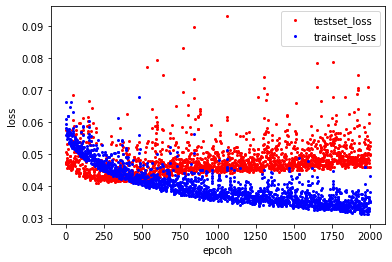

In [22]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c ="red", markersize=2, label="testset_loss")
plt.plot(x_len, y_loss, "o", c ="blue", markersize=2, label="trainset_loss")
plt.legend(loc='upper right')
plt.xlabel('epcoh')
plt.ylabel('loss')
plt.show()

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=20)

In [24]:
modelpath = "./CH14-4-bestmodel.hdf5"

In [25]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose =0, save_best_only=True)

In [26]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.0473 - val_accuracy: 0.9908
Epoch 2/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.9915 - val_loss: 0.0474 - val_accuracy: 0.9892
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.9910 - val_loss: 0.0478 - val_accuracy: 0.9900
Epoch 4/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.9908 - val_loss: 0.0479 - val_accuracy: 0.9900
Epoch 5/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.9905 - val_loss: 0.0478 - val_accuracy: 0.9892
Epoch 6/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.9920 - val_loss: 0.0477 - val_accuracy: 0.9900
Epoch 7/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.9920 - val_loss: 0.0505 - val_accuracy: 0.9900
Epoch 8/2000
8/8 [=

In [27]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9915
Test accuracy: 0.9915384650230408
